# ・[Extract contours with OpenCV.]

97 64 30 28
101 9 90 81


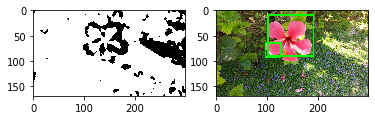

In [14]:
import cv2
import matplotlib.pyplot as plt

#! Load the image and resize.
img = cv2.imread("flower.jpg")
img = cv2.resize(img, (300, 169))

#!
#! Binary color space.
#!
#! Match the image data with the learned data.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Smooth image. (画像を平滑化(ぼかし))
gray = cv2.GaussianBlur(gray, (7, 7), 0)
# Image binarization. (画像を2値化)
im2 = cv2.threshold(gray, 140, 240, cv2.THRESH_BINARY_INV)[1]

#!
#! Draw a binarized image on the left side of the screen.
#!
plt.subplot(1, 2, 1)
plt.imshow(im2, cmap="gray")

#! Contour extraction.
#print(cv2.findContours, __doc__)
cnts = cv2.findContours(im2,
                        cv2.RETR_LIST,
                        cv2.CHAIN_APPROX_SIMPLE)[0]

#! Draw the extracted frame.(輪郭抽出)
for pt in cnts:
    x, y, w, h = cv2.boundingRect(pt)
    # Eliminate areas that are too large or too small.
    if w < 30 or w > 200:
        continue
    print(x, y, w, h)
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Draw the extraction result on the right side of the screen.
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.savefig("find_contours.png", dpi = 200)
plt.show()


| | 定数 | 意味 |
|----|:----|:----|
| 1 | cv2.RETR_LIST | 単純に輪郭を抽出。|
| 2 | cv2.RETR_EXTERNAL | 最も外側の輪郭のみ検出。|
| 3 | cv2.RETR_CCOMP | 階層を考慮し2レベルの輪郭を検出。|
| 4 | cv2.RETR_LIST | すべての輪郭を検出し階層構造を保持。|

| | 定数 | 意味 |
|----|:----|:----|
| 1 | cv2.CHAIN_APPROX_NONE | 輪郭上のすべての点を保持する。|
| 2 | cv2.CHAIN_APPROX_SIMPLE | 冗長な点情報を削除して返す。|
